In [378]:
########### Stock Price Predictions using Linear Regression ###########

#Mr Z is a huge fan of blizzard company and he has an extra money for an investment. He want to invest in a company with high reputation and strong uptrend
#It is important for him to analyze the company performance and its stock price pattern before he started to invest.
#Then, he also want to know when is the right time to buy the stock.

'''
In this case, we want to apply linear regression (LR) method for the stock price prediction. We focus on developing the LR model based on the historical
data provided and we also included technical indicator in training our model to predict future prices.
'''
#Let's get started!

##### Import Packages & Read Data #####

#First thing first, we need to import python packages and load our data before we start to process it

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [379]:
path = %pwd

histdata = pd.read_csv(path + 'dataset/act_bliz.csv')

In [380]:
# This is how our data looks like
histdata.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2010-01-04,11.23,11.45,11.15,11.30,9310055,USD
1,2010-01-05,11.24,11.36,11.21,11.32,11370203,USD
2,2010-01-06,11.26,11.38,11.21,11.26,6541811,USD
3,2010-01-07,11.10,11.19,10.93,10.99,15392067,USD
4,2010-01-08,10.97,11.05,10.88,10.90,11003838,USD


In [381]:
##### Data Cleaning & Preparation #####

#Apply exploratory descriptive analysis (EDA) method to analyze the data
#This dataset is good as there are no missing values in our data
#Good quality of dataset will generate high model accuracy


histdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3094 entries, 0 to 3093
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3094 non-null   object 
 1   Open      3094 non-null   float64
 2   High      3094 non-null   float64
 3   Low       3094 non-null   float64
 4   Close     3094 non-null   float64
 5   Volume    3094 non-null   int64  
 6   Currency  3094 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 169.3+ KB


In [382]:
#summary statistics
histdata.describe()

,Open,High,Low,Close,Volume
count,3094.000000,3094.000000,3094.000000,3094.000000,3.094000e+03
mean,40.020016,40.490152,39.496092,40.007146,8.437610e+06
std,26.762533,27.053985,26.408768,26.731874,6.041151e+06
min,9.970000,10.160000,9.930000,10.010000,4.627200e+05
25%,13.402500,13.565000,13.272500,13.467500,5.281720e+06
50%,35.185000,35.485000,34.755000,35.175000,7.047754e+06
75%,62.622500,63.367500,61.980000,62.745000,9.745516e+06
max,103.820000,104.490000,102.580000,103.810000,1.330824e+08


In [383]:
#Set index 'Date' column as dataframe index
histdata.set_index(pd.DatetimeIndex(histdata["Date"]),inplace=True)

In [384]:
histdata.head()

,Date,Open,High,Low,Close,Volume,Currency
Date,,,,,,,
2010-01-04,2010-01-04,11.23,11.45,11.15,11.30,9310055,USD
2010-01-05,2010-01-05,11.24,11.36,11.21,11.32,11370203,USD
2010-01-06,2010-01-06,11.26,11.38,11.21,11.26,6541811,USD
2010-01-07,2010-01-07,11.10,11.19,10.93,10.99,15392067,USD
2010-01-08,2010-01-08,10.97,11.05,10.88,10.90,11003838,USD


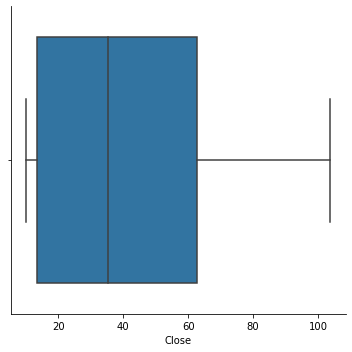

In [385]:
#To further analyze our data, we also would like to see if outliers exist in our dataset
#Plot boxplot graph to identify the outliers
#By referring to the boxplot, thankfully there is no outlier in our dataset

sns.catplot(x='Close',kind='box',data=histdata)
plt.show()

In [386]:
#we'll use Close variable only
df = histdata[["Close"]]

In [387]:
df.head()

,Close
Date,
2010-01-04,11.30
2010-01-05,11.32
2010-01-06,11.26
2010-01-07,10.99
2010-01-08,10.90


In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3094 entries, 2010-01-04 to 2022-04-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3094 non-null   float64
dtypes: float64(1)
memory usage: 48.3 KB


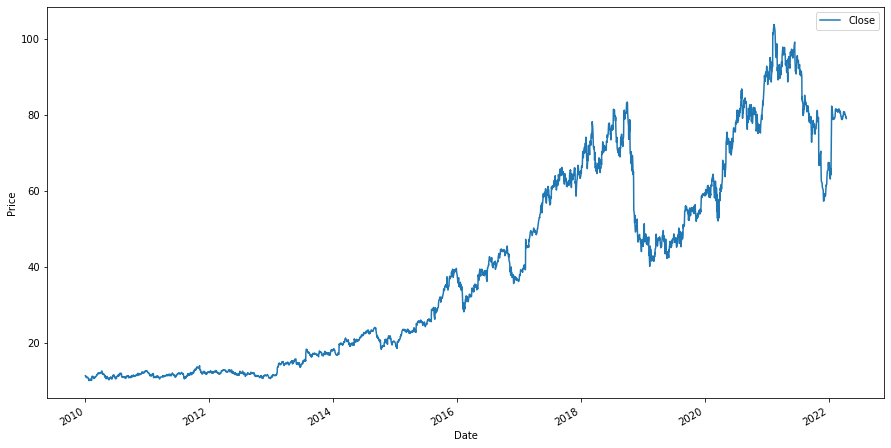

In [389]:
#Let's plot the original price and see the trend
#The graph shows that the price movement is in uptrend
#Thus, it met Mr Z's requirement


df.plot.line(y="Close",use_index=True,figsize=(15,8))
plt.ylabel('Price')
plt.show()

In [390]:
# As mentioned above, we will add a technical indicator in our stock price prediction model
# There are a lot of technical indicators available such as SMA,EMA,MACD and many more. In our case, we'll use Exponential Moving Average (EMA) as our technical indicator
# Fortunately, python has a module called pandas_ta which consists of list of technical indicators for technical analysis(TA) purposes.
# To apply EMA in our analysis, we need to specify the number of period that we want to calculate its average values
# We decided to calculate the EMA over 10 days period and add the values into new column in our dataset

import pandas_ta

#EMA calculated over 10-days period, length = 10 and append into existing dataframe
df.ta.ema(close="Close",length=10,append=True)

/Users/harishusnan/opt/anaconda3/lib/python3.8/site-packages/pandas_ta/core.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ind_name] = result


Date
2010-01-04          NaN
2010-01-05          NaN
2010-01-06          NaN
2010-01-07          NaN
2010-01-08          NaN
                ...    
2022-04-08    80.180280
2022-04-11    80.052957
2022-04-12    79.959692
2022-04-13    79.803384
2022-04-14    79.666405
Name: EMA_10, Length: 3094, dtype: float64

In [391]:
#inspect data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3094 entries, 2010-01-04 to 2022-04-14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3094 non-null   float64
 1   EMA_10  3085 non-null   float64
dtypes: float64(2)
memory usage: 72.5 KB


In [392]:
#since we have NaN values in our data
#we choose to drop the NaN values
#NaN values existed due to no preceeding values from which EMA function could be calculated
#EMA function calculated the average value by getting the values from Day 1 - Day 10 divided by count = 10 (days) and display on 10th row

df.head(10)

,Close,EMA_10
Date,,
2010-01-04,11.30,NaN
2010-01-05,11.32,NaN
2010-01-06,11.26,NaN
2010-01-07,10.99,NaN
2010-01-08,10.90,NaN
2010-01-11,10.89,NaN
2010-01-12,10.77,NaN
2010-01-13,10.91,NaN
2010-01-14,10.86,NaN


In [393]:
#One of the options to deal with missing values is to drop the rows with missing values
df=df.dropna()
df.head()

,Close,EMA_10
Date,,
2010-01-15,10.89,11.009000
2010-01-19,10.84,10.978273
2010-01-20,10.82,10.949496
2010-01-21,10.59,10.884133
2010-01-22,10.37,10.790654


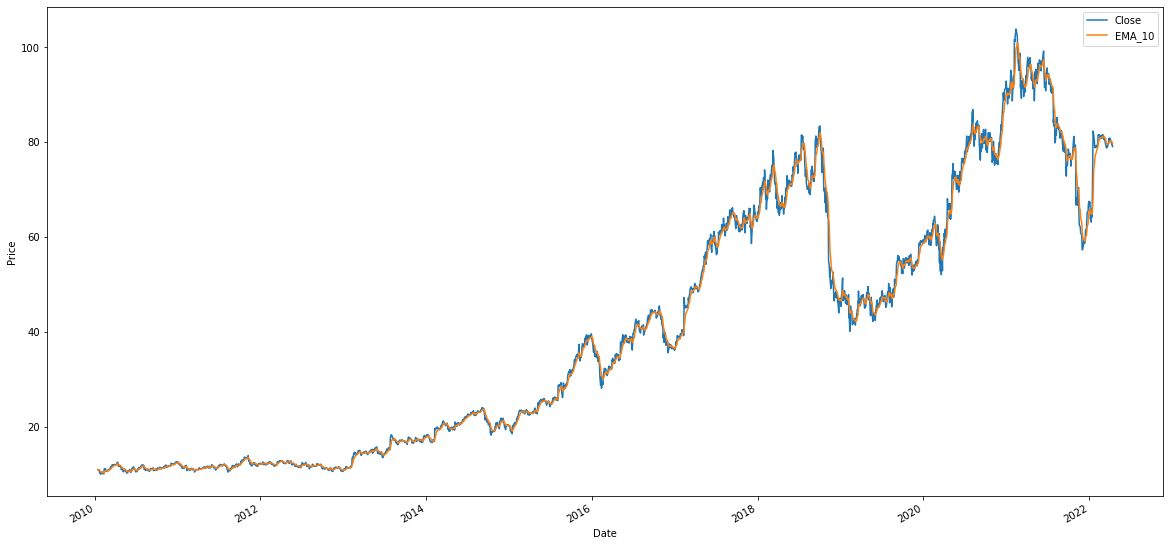

In [394]:
#The plot shows that there is only a small difference between actual and EMA-10 values
#Thus we can proceed with the model development

df.plot.line(use_index=True,figsize=(20,10))
plt.ylabel('Price')
plt.show()

In [395]:
##### Linear Regression Model Development #####

#In order to develop our model, we need to split the data set
#So, we apply 80/20 partition to form our training and testing data set

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df[["Close"]],df[["EMA_10"]],test_size=0.2)

In [400]:
#build the model

from sklearn.linear_model import LinearRegression

#set the model
model = LinearRegression()

#train the model
model.fit(x_train,y_train)

#test model with 617 samples
y_pred = model.predict(x_test)

In [401]:
#Now, we have developed our model and we need to determine how well it's performed
#We evaluate our model using coefficient of determination (r2_score) and mean absolute error
#We can conclude that our LR model fits our data very well
from sklearn.metrics import r2_score,mean_absolute_error

#evaluation metrics
#lower MAE is better
#closer model correlation coefficient to 1.0 the better
print("Model coefficient: ", model.coef_)
print("Model mean absolute error: ", mean_absolute_error(y_test,y_pred))
print("Model R squared error: ", r2_score(y_test,y_pred))

Model coefficient:  [[0.997193]]
Model mean absolute error:  0.8000523819054354
Model R squared error:  0.997697427850917


In [403]:
##### Data Visualization #####

#convert array to dataframe
y_pred = pd.DataFrame(y_pred)

#adding column name
y_pred.columns = ["Predicted"]

#combine dataframe y_pred to y_test
y_test['Predicted'] = y_pred['Predicted'].values

y_test

,EMA_10,Predicted
Date,,
2016-08-18,40.471705,39.942460
2020-09-23,80.554974,79.939871
2017-04-04,49.402258,48.937141
2016-05-16,37.153312,39.314228
2021-11-26,63.572786,60.484636
...,...,...
2020-08-21,82.558984,83.011226
2013-08-23,16.948557,16.707863
2011-02-08,11.660433,11.881449


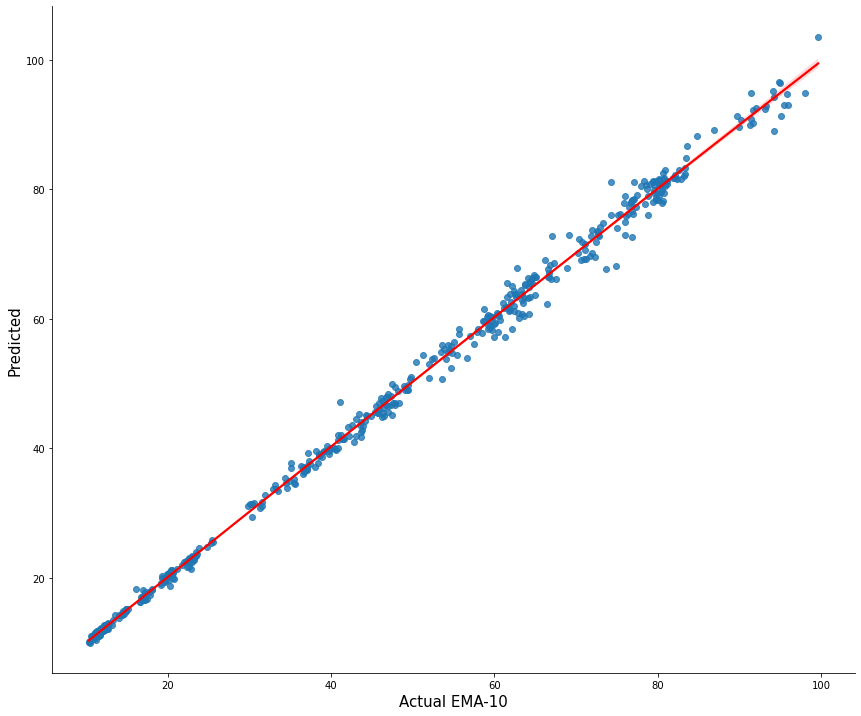

In [404]:
sns.lmplot(x='EMA_10',y='Predicted',data=y_test,order=2, line_kws={'color':'red'} ,height=10,aspect=1.2)
plt.xlabel("Actual EMA-10",fontsize=15)
plt.ylabel("Predicted",fontsize=15)
plt.show()

In [405]:
#interpretation

df.head()

,Close,EMA_10
Date,,
2010-01-15,10.89,11.009000
2010-01-19,10.84,10.978273
2010-01-20,10.82,10.949496
2010-01-21,10.59,10.884133
2010-01-22,10.37,10.790654


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2016-08-18 00:00:00'),
  Text(1, 0, '2020-09-23 00:00:00'),
  Text(2, 0, '2017-04-04 00:00:00'),
  Text(3, 0, '2016-05-16 00:00:00'),
  Text(4, 0, '2021-11-26 00:00:00'),
  Text(5, 0, '2010-08-04 00:00:00'),
  Text(6, 0, '2022-04-01 00:00:00'),
  Text(7, 0, '2012-08-21 00:00:00'),
  Text(8, 0, '2019-12-12 00:00:00'),
  Text(9, 0, '2010-05-25 00:00:00')])

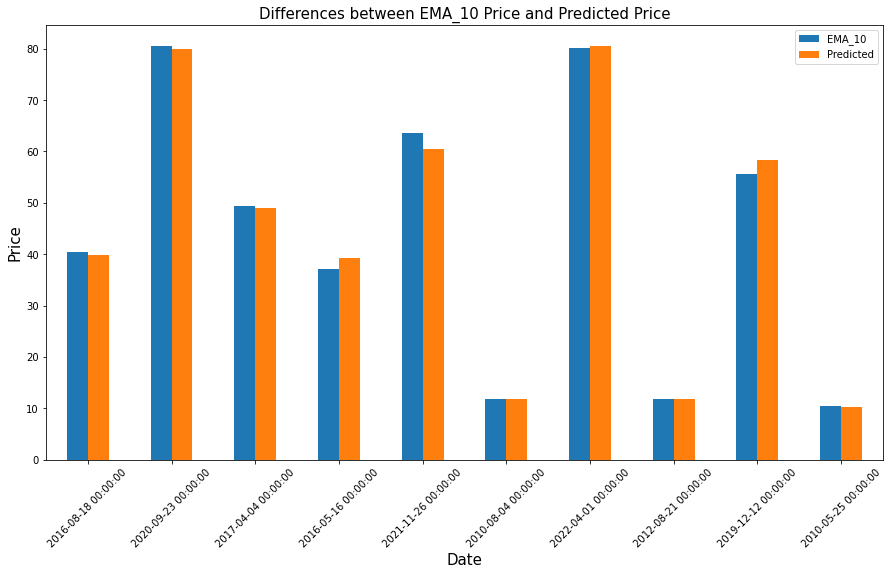

In [407]:
y_test.head(10).plot(kind='bar',figsize=(15,8))
plt.title('Differences between EMA_10 Price and Predicted Price',fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.xticks(rotation=45)

In [408]:
x=df[['Close']]

y_predict2 = model.predict(x)

In [409]:
y_predict2 = pd.DataFrame(y_predict2)

y_predict2.columns = ["Predicted"]

df['Predicted'] = y_predict2['Predicted'].values

df.head()

/var/folders/83/r7pz3mp556l3dv55tswrdz9r0000gn/T/ipykernel_93527/3602459743.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted'] = y_predict2['Predicted'].values


,Close,EMA_10,Predicted
Date,,,
2010-01-15,10.89,11.009000,10.894228
2010-01-19,10.84,10.978273,10.844368
2010-01-20,10.82,10.949496,10.824424
2010-01-21,10.59,10.884133,10.595070
2010-01-22,10.37,10.790654,10.375688


In [411]:
df2 = histdata.iloc[9:].drop(['Date','High','Low','Close','Volume','Currency'],axis=1)
df2['Adjusted Close'] = df['EMA_10'].values
df2['Predicted'] = df['Predicted'].values
df2['Diff'] = df2['Open'] - df2['Predicted']

In [415]:
#Change +ve result in Decision column to 'Sell', -ve to 'Buy' and 0 to 'Hold'
df2['Decision'] = df2['Diff'].apply(lambda x: 'Sell' if x > 0 else('Buy' if x < 0 else 'Hold'))

In [416]:
a = df2['Decision'].value_counts()
pd.DataFrame(a)

,Decision
Sell,1625
Buy,1460


In [419]:
#Finally we have developed our model based on historical price and EMA indicator
#We also evaluated and satisfied with our model performance and accuracy
#Our goal is to develop a model that can use EMA of any given day (based on last 9 days data) to predict the value of closing price on that day
#By taking the difference between the open and predicted close price, we can determine whether we should buy/hold/sell the stock

df2.head(10)

,Open,Adjusted Close,Predicted,Diff,Decision
Date,,,,,
2010-01-15,11.02,11.009000,10.894228,0.125772,Sell
2010-01-19,10.90,10.978273,10.844368,0.055632,Sell
2010-01-20,10.78,10.949496,10.824424,-0.044424,Buy
2010-01-21,10.83,10.884133,10.595070,0.234930,Sell
2010-01-22,10.56,10.790654,10.375688,0.184312,Sell
2010-01-25,10.38,10.668717,10.126389,0.253611,Sell
2010-01-26,10.11,10.548950,10.016698,0.093302,Sell
2010-01-27,9.97,10.514596,10.365716,-0.395716,Buy
2010-01-28,10.34,10.466487,10.256024,0.083976,Sell


In [420]:
#Write the output to local
df2.to_csv('Blizzard Model Output.csv')